# Exploratory Data Analysis
### KirbyDownB
During this phase, we'll be performing EDA on the data we've collected. As of now, we have restaurant data from Yelp, along with income data based on zip code, which we scraped.

## Install Packages

In [2]:
!pip3 install pymongo nltk wordcloud textblob numpy

## Import Packages

In [1]:
from pymongo import MongoClient
from constants import mongodb_atlas_connection
from helpers import isZipCodeValid
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

import nltk
import pandas as pd
import numpy as np
import re

nltk.download('punkt')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /Users/aditya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aditya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Fetch Data

In [24]:
client = MongoClient(mongodb_atlas_connection)

yelp_db = client['yelp']
income_db = client['income']

restaurants_collection = yelp_db['restaurants_new']
reviews_collection = yelp_db['reviews']
zip_code_collection = income_db['zipcode']

zip_codes = list(zip_code_collection.find())
zip_restaurants = list(restaurants_collection.find())
reviews = list(reviews_collection.find())

# Check for valid zip codes
zip_codes = list(filter(lambda x: isZipCodeValid(x['zip']), zip_codes))

client.close()



In [25]:
zip_restaurants[0]['restaurants']

[{'id': 'vjGFXOzI1TCLYnnYYjxiXg',
  'alias': 'market-restaurant-bar-del-mar-2',
  'name': 'Market Restaurant + Bar',
  'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/Km5SKlnil7A38IDzFB-0yg/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/market-restaurant-bar-del-mar-2?adjust_creative=87ZoX74vEDHYK8lTm1ZN5Q&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=87ZoX74vEDHYK8lTm1ZN5Q',
  'review_count': 910,
  'categories': [{'alias': 'newamerican', 'title': 'American (New)'},
   {'alias': 'cocktailbars', 'title': 'Cocktail Bars'},
   {'alias': 'sushi', 'title': 'Sushi Bars'}],
  'rating': 4.5,
  'coordinates': {'latitude': 32.98317, 'longitude': -117.23017},
  'transactions': ['delivery'],
  'price': '$$$$',
  'location': {'address1': '3702 Via De La Valle',
   'address2': '',
   'address3': '',
   'city': 'Del Mar',
   'zip_code': '92014',
   'country': 'US',
   'state': 'CA',
   'display_address': ['3702 Via De La Valle', 'Del Mar, CA 92014']},


In [26]:
stop_words = stopwords.words('english')
rest_review = {}

for review in reviews:
    polarity = 0
    subjectivity = 0
    review_count = 0
    rid = review['rid']
    rName = review['name']    
    
    for i in review['reviews']:
        pre_process = i['text'].lower()
        pre_process = re.sub('[^a-z0-9]+', ' ', pre_process)
        pre_process = word_tokenize(pre_process)
        pre_process = [w for w in pre_process if not w in stop_words] 
        temp = list(TextBlob(' '.join(pre_process)).sentiment)
        polarity += temp[0]
        subjectivity += temp[0]
        review_count += 1
    
    polarity = polarity/review_count 
    subjectivity = subjectivity/review_count
    rest_review[rid] = [polarity, subjectivity]
        
print(rest_review)

{'vjGFXOzI1TCLYnnYYjxiXg': [0.03888888888888888, 0.03888888888888888], 'gxwEOjyhbMYCBSQ7tB7aNw': [0.3412698412698412, 0.3412698412698412], 'ULJp8Bc_7iLHNz6Xzi2eRw': [0.48482142857142857, 0.48482142857142857], '3yQtkLcDAqMVX5oNYHyJhA': [0.3118055555555555, 0.3118055555555555], 'Sc3Mpf7ei8CS8PW7HD2k6w': [0.32215909090909095, 0.32215909090909095], '8yypZYpI2QrSeAkqSQthBw': [0.21333333333333335, 0.21333333333333335], '1vMgajRAI3lYwuCeGX58oQ': [0.13555555555555554, 0.13555555555555554], 'vhfPni9pci29SEHrN1OtRg': [0.15814814814814815, 0.15814814814814815], 'Q4tOrahHwvFOgChzBsm5yw': [0.20925925925925926, 0.20925925925925926], '3b0yY-kCOG-1Eq9oamlSzw': [0.40381944444444445, 0.40381944444444445], 'gYZbQe-zYyMpd9z1ud0T0w': [0.38537037037037036, 0.38537037037037036], 'KyU7XWDPclmZ3BpdIsd_0Q': [0.4592352092352092, 0.4592352092352092], '_1yJBsOdhRtYHl0_QzFHug': [0.013888888888888886, 0.013888888888888886], '3qjl3TrEFGGNDv8J9YHIKg': [0.09999999999999999, 0.09999999999999999], 'ud9ocsQHI7h3zNO7FdOFYQ

In [55]:
rest_zip_code = {}
rest_ratings = {}
rest_price = {}
rest_review_count = {}
for zip_restaurant in zip_restaurants:
    restaurants = zip_restaurant['restaurants']
    zip_code = zip_restaurant['zipcode']
    
    for restaurant in restaurants:
        rid = restaurant['id']
        rating = restaurant['rating']
        try:
            price = restaurant['price']
            print(price)
            print(restaurant['review_count'])
            review_count = restaurant['review_count']
        except:
            continue
        rest_zip_code[rid] = zip_code
        rest_ratings[rid] = rating
        rest_price[rid] = price
        rest_review_count[rid] = review_count

print(rest_ratings)

$$$$
910
$$
2163
$$
236
$$
1378
$$$$
330
$$
1507
$$
1067
$$
251
$$
1971
$$
828
$$
343
$$
759
$
1066
$$
4681
$
530
$$$
1277
$$
142
$$$
536
$
1440
$$
1443
$$$
2376
$$
1598
$$
1135
$$
1106
$$
1892
$$
2223
$$
1477
$$$
997
$$
2316
$
1126
$$$
609
$$
1005
$$
2208
$$
2809
$$
1010
$$$
1980
$
792
$$$
1825
$$
1714
$$
3767
$$$
1408
$$
1049
$$
1691
$$
1752
$$
2213
$$
1598
$$$
2376
$$
2920
$$
1305
$
1126
$$
3767
$$$$
1048
$$
1106
$$
654
$$
316
$$
521
$$
1892
$
2223
$$
1477
$
1064
$$
437
$$
1063
$$
582
$$
781
$$
909
$$
807
$$
346
$$
109
$$
417
$$
1261
$$$
964
$$
478
$$
195
$$
261
$$
318
$$
466
$$$
1215
$$
445
$$
391
$$
771
$$$
705
$$
1948
$
790
$
1005
$$
1092
$$
1206
$$$
586
$$$
598
$$$
1062
$$$$
628
$$
785
$$$$
331
$
377
$
783
$$$
205
$$
1093
$$
419
$$
1418
$$
436
$$
635
$$$
1215
$$
716
$
374
$$
916
$$$
964
$$
818
$$
659
$
257
$
1346
$$
1884
$$
771
$
525
$$
1306
$$
347
$$
316
$$
423
$$$
751
$$$
1443
$$$
761
$$
266
$$$$
2185
$$$$
1142
$$
583
$$$
734
$$
1808
$$$
1232
$$$
257
$$
414
$$
904
$$$$
3628
$


280
$$
164
$
93
$$
208
$$
135
$$
1884
$
1346
$$
1306
$$
1065
$$
1532
$$$
1443
$$
1017
$$
1539
$$
1181
$$$
1472
$$$
970
$$
1016
$$
488
$$
807
$
801
$
523
$$
833
$$
426
$$
836
$
1048
$$
1020
$$
1372
$$
645
$$
1526
$$
2734
$$
2259
$$$
716
$$
1367
$$
7083
$$
480
$$
400
$$
362
$$
3767
$$
710
$$
763
$$
1231
$$$$
437
$$
655
$$$
790
$$
1222
$$
278
$$
1358
$$
926
$
580
$$
921
$
328
$
795
$$
730
$$
660
$$
1797
$$
883
$
65
$$
146
$$
1102
$$
2041
$$$
398
$
496
$$
651
$$
385
$$
386
$$
760
$$
455
$$
953
$$
724
$$
1201
$$
445
$$
727
$$
718
$$
734
$$
321
$$
612
$
339
$$
339
$$
660
$$
85
$$
479
$$
596
$$
224
$$
376
$$
448
$
2223
$$
3767
$$
2440
$$
1752
$$$
1869
$$
5476
$$$$
3628
$$
1127
$
1027
$$
1381
$$
2037
$
1064
$$
1159
$$
1259
$$
997
$
902
$
590
$$
2024
$
784
$
535
$$$$
5509
$$$
7151
$$$
2057
$$
1614
$$
1581
$$
3648
$$
1522
$$
2926
$$
592
$$
945
$$$$
725
$$$
1337
$$
1140
$$
10968
$$
2966
$$
885
$$$
2760
$$
1530
$$
906
$$
638
$$
7083
$$
2734
$$
3077
$$
947
$$
1222
$$
2575
$
1557
$$
494
$$
1139
$$
1

416
$
2091
$$
1881
$$
760
$$
1211
$$
903
$$
685
$
2091
$$
194
$$
1299
$$$$
714
$$
750
$$
1311
$
466
$
1516
$$
1338
$$
2238
$$
1692
$$
1056
$$
1553
$$
2226
$$
140
$
626
$$
337
$$
735
$$
1124
$$
688
$$
442
$$
421
$$
863
$$
386
$$
846
$
348
$$
258
$
482
$$
900
$$$$
1039
$$
700
$
227
$$
328
$$
575
$$
2176
$$
1127
$$
2762
$$
2155
$$
1142
$$
369
$
762
$$
1136
$$
1479
$
430
$
973
$$
2079
$
876
$$
919
$$
641
$$
494
$$
2224
$$
784
$$
730
$
444
$$
712
$
777
$$
2166
$$
2553
$$
2719
$$
2090
$
1946
$
1248
$$
890
$$
1872
$$
1546
$$
789
$$
1783
$$
1740
$$
861
$$
612
$
603
$$
1061
$$
1277
$$
1455
$$
1280
$
284
$
668
$$
500
$$
1169
$$
878
$
316
$
798
$$
268
$$
905
$
384
$$
1303
$$
269
$$
319
$
329
$
296
$$
680
$
1174
$$
1179
$$
550
$$
243
$
4773
$$
2166
$$
2719
$
2464
$
618
$$
2762
$$
3134
$$$
1051
$$
1061
$$
1740
$$
1014
$$
3024
$$
2090
$$
4464
$$
775
$
1248
$$
1916
$$
1525
$$
2376
$$
854
$$
3767
$$
2440
$$
1752
$
2223
$$
1127
$
1027
$$
5476
$$
1159
$
590
$$
2259
$
442
$$$
1869
$$
1083
$$
1367
$$
2037

$$
1878
$
223
$$
614
$$
518
$$
1222
$$
499
$$
211
$$
238
$$
1329
$$
402
$$
189
$$
89
$$
290
$$$$
2185
$$$
1232
$$
1808
$$
151
$$$$
3628
$$
187
$$$$
1142
$
106
$
2731
$
1267
$$
583
$$
3089
$
106
$$$
62
$$$$
1179
$$$
734
$$
758
$$$
1046
$$$
1294
$
841
$$
3727
$$
1532
$$
444
$$
2386
$$
1131
$$
758
$$$
1804
$$
567
$
888
$$
459
$$
697
$$
2200
$
1011
$
937
$$
1400
$
360
$$
452
$$
515
$$
365
$
380
$
9328
$$
227
$$
200
$$
734
$
432
$$
108
$$
156
$
330
$$
1504
$$
1415
$$
342
$$
352
$$
209
$$
3049
$$
2541
$
111
$$
604
$$
256
$$
190
$$
2316
$$
1695
$$
1454
$$
602
$$
636
$
863
$$
656
$$
720
$$$
2548
$$
2036
$$
694
$$$
997
$$
626
$$
802
$$
491
$$$
881
$$
902
$
272
$$
901
$
281
$$
395
$$
286
$$
290
$
170
$$
758
$
72
$
106
$$
151
$$
187
$
323
$
106
$$
251
$$
379
$$
354
$$
445
$
48
$
192
$$
224
$$
243
$$
1838
$
1192
$
1141
$$
1060
$$
744
$$
1441
$$
593
$$
692
$$
439
$$
770
$$
704
$$$
482
$$
681
$$
609
$$$
1141
$$
228
$$
811
$$
566
$$
548
$$
467
$$
994
$$
868
$$
680
$$
576
$$
391
$$
181
$$
597
$$
139
$

341
$$
617
$
232
$$
660
$
875
$$
294
$$
424
$$
253
$
206
$
244
$$
344
$$
501
$$$
440
$$
213
$
247
$
179
$$
409
$
279
$$
286
$$
167
$$
1207
$$
1074
$$
786
$
741
$
583
$$
2531
$$
1712
$$
2149
$$
491
$
217
$$
1897
$$
960
$$
588
$$
1352
$$
921
$$
550
$$
495
$
1067
$$
479
$
351
$$
1927
$$
972
$$
2832
$$
2377
$$
1948
$$
1539
$$$
2234
$
9328
$$$
1176
$$
2020
$$
2478
$$
900
$
380
$$
1373
$$
1363
$$$$
575
$$
429
$$
1214
$$$
666
$$$
940
$$
758
$$
379
$
323
$$
354
$$
243
$$
251
$$
395
$$
2055
$$
445
$
192
$
72
$$
193
$$
1790
$$
286
$$
350
$$
223
$
197
$
158
$$$
2689
$$
1178
$$
3134
$$
2762
$
1764
$$
3456
$$
2719
$$$
1581
$
189
$$
1061
$$$
1861
$$
1740
$$
1193
$$
1916
$$
828
$
1719
$$$
1561
$$
1095
$
840
$$
2376
$$
1525
$
695
$
1736
$
1798
$$
1260
$$
1947
$$
801
$$
1495
$
1324
$$
1305
$$
1515
$$
561
$$
1175
$
674
$$
511
$
781
$
1153
$
535
$$
390
$
132
$$
939
$
724
$$
286
$
160
$$
659
$$
1148
$$
94
$
295
$$
345
$$
614
$$
246
$$
113
$$
306
$
1074
$$
483
$$
1092
$$
394
$
304
$$
265
$$
1719
$$
413
$$


95
$$
45
$
81
$
94
$$
166
$$
164
$
17
$
44
$
27
$
10
$$
79
$$
123
$$
1814
$$
1447
$
761
$$
2664
$$
1724
$
1715
$$
768
$$$
666
$$
1145
$
798
$$
1060
$$
690
$$
1130
$$
1994
$$$
646
$
422
$$
518
$$
825
$$
1007
$$
868
$$
3894
$$
2282
$$
1818
$$$
2397
$
825
$$
1427
$$
2117
$
506
$$
1868
$$
970
$
599
$
479
$$
1542
$$
828
$$
1611
$$
2142
$
1841
$$
1117
$
198
$$
1309
$$
1674
$
1183
$$
1533
$$
535
$
536
$
963
$
2070
$
644
$
777
$$
190
$
607
$
479
$$
1693
$
321
$$
796
$$
716
$
391
$
513
$$
514
$$
755
$$
4613
$$$
2195
$$$
1018
$
1667
$$
2625
$$
3874
$
1710
$$
3067
$$$$
1249
$
2086
$$
1303
$$
1933
$$
650
$$
1463
$$$
1276
$$
2606
$$
2009
$$
2281
$$
1715
$
547
$$
651
$$
300
$$
367
$$
403
$
214
$$
222
$$
818
$$
474
$$
165
$$
724
$$
261
$$
264
$$
198
$$$
148
$$
170
$
127
$
184
$
109
$
195
$$
110
$$
3648
$$
2926
$$$
2760
$$
2233
$$$
3067
$$
2872
$
1285
$
1684
$$
1511
$$
1283
$$
1195
$
758
$$$
1955
$$
1471
$$
1059
$$
1006
$$
916
$$
734
$$$$
886
$
336
$
557
$$
615
$
67
$
261
$
41
$$
220
$$
272
$$
269
$$


308
$$
554
$$
1129
$
346
$$
443
$$
107
$$
374
$$
4808
$$
4054
$
164
$$
148
$$
483
$$
618
$$
833
$
694
$$
354
$$
498
$$
489
$$
301
$
740
$
758
$$
1313
$
531
$$
534
$
695
$$
687
$$
653
$
682
$$
308
$$
599
$$
874
$$
1055
$$
415
$$
762
$$
383
$
3070
$$
724
$$
894
$
892
$
504
$
475
$$
701
$$
1450
$$
5130
$$
1230
$
175
$$
279
$
794
$$
282
$$
357
$$
2653
$
236
$$
320
$$
1068
$$
347
$$
3107
$
396
$$
898
$
265
$
367
$$
197
$$
556
$$
202
$$
373
$$
683
$$
952
$$
1027
$
135
$$
1519
$$
198
$
172
$
691
$$
385
$$
288
$$
1871
$
222
$$
166
$
108
$
66
$$
103
$
22
$
35
$$
34
$$
87
$$
35
$$
45
$$
46
$$
91
$$
10
$$
83
$
5
$
12
$$
3
$$
1522
$
1238
$$
2980
$$
2994
$$
529
$$
1181
$$
2301
$
1745
$
1263
$$
266
$$
1415
$$
1450
$$
407
$
794
$$$
772
$$
1101
$$
615
$$
735
$$
1064
$$
1800
$$$
2454
$$$
2154
$$
4073
$$
3430
$$
2087
$$
2010
$$
2410
$
794
$$
1814
$$
538
$$
1396
$$
1565
$
446
$$
869
$$
1416
$
684
$$
1077
$$
1825
$$
880
$$
492
$$
2374
$$
1254
$$
2225
$
746
$$
1323
$$
858
$$
1511
$$
947
$$
797
$$
261
$$
19

$$
116
$$
172
$$
139
$
431
$$
73
$$
44
$$
74
$$
137
$
9328
$$
1393
$$
2832
$$
2377
$$
1214
$$
1093
$
880
$$
2098
$$
797
$
1434
$$
2020
$$
2193
$$
3755
$$
554
$$
610
$$
2478
$$
779
$$$
1182
$$
877
$$
632
$$
1519
$
691
$$
726
$$
1346
$$
537
$$
553
$$
1080
$
628
$
570
$
417
$$
562
$
457
$$
418
$$
204
$$
560
$$
679
$$
805
$
219
$$
336
$
321
$
4773
$
2464
$$
4464
$$
2320
$$
934
$
800
$$
1280
$$
1103
$$
1269
$
545
$$
706
$$
1234
$$
806
$$
3233
$
417
$$
1059
$$
638
$$
789
$
1063
$$
452
$
304
$$
1092
$$
570
$$
659
$$
413
$
137
$$
1148
$
295
$$
306
$
163
$$
345
$
74
$$
379
$$
356
$
175
$$
296
$$
215
$$
148
$$
394
$
93
$$
128
$$
106
$$
92
$$
51
$$
108
$$
50
$$
46
$$
68
$$
65
$$
54
$$$
31
$$
18
$
21
$$
34
$
22
$
17
$
29
$
4
$$
1054
$$
83
$$
414
$$
587
$$$
445
$
402
$
431
$$
77
$$
610
$$
371
$$
149
$$
456
$$
272
$$
273
$$
275
$
65
$$
84
$$
661
$
270
$$
268
$$
1095
$
51
$$
1416
$
521
$$
527
$$
1134
$
550
$$
174
$$
421
$$
171
$$
469
$$
365
$$
404
$
216
$$
439
$$
366
$$
630
$$
277
$$
125
$$
3921
$$
2

309
$$
121
$
97
$$
46
$
54
$
89
$$
84
$
64
$$
154
$
21
$$
87
$$
86
$
68
$$
111
$$
52
$$
56
$$
38
$$
78
$$
423
$$
275
$$
262
$$
241
$$
214
$
226
$$
280
$$
274
$$
286
$
101
$
122
$$
293
$$
87
$$
291
$$
402
$$
77
$
59
$$
135
$$
204
$$
136
$$
4073
$$
1844
$$
1974
$$
2724
$$
729
$
1156
$$
2143
$$
1840
$$
635
$
778
$
682
$$
1042
$
478
$$
732
$$
3233
$$
1899
$$
747
$$
600
$$
884
$$
940
$$
3326
$$
729
$$
961
$$
1514
$$
1945
$$
1551
$$
1121
$$
2807
$$
1163
$$
697
$$
740
$$$
1474
$$
1195
$$
1108
$$
1747
$$
519
$
280
$$
400
$$
708
$$
1400
$$
1077
$$
2143
$$
4073
$
512
$$
1368
$
653
$$
1454
$$
1088
$
2088
$$
702
$
1156
$$
1040
$
1523
$$
3233
$$
3004
$
201
$$$
2454
$$
689
$$
1814
$$
377
$$
1608
$$
352
$$
1316
$
309
$$$
586
$$$
644
$$
548
$$$
824
$$
110
$$
133
$
208
$$
1088
$$
477
$
337
$
275
$$
324
$$
110
$$
305
$$
248
$$
171
$
6
$$$$
9
$
10
$
3
$
6
$
4
$
11
$
5
$
11
$
12
$
4
$$$
3714
$$
2051
$$
1667
$$
2205
$
2765
$$
1731
$$
1646
$$
13966
$$
1058
$
1637
$
607
$$
1649
$$
512
$
1407
$
1144
$$
1017
$

$$
486
$
126
$$
211
$$
439
$$
460
$$
391
$$
262
$$
123
$$$
449
$
173
$$
48
$$
237
$$
348
$$$
69
$$
43
$
108
$
79
$$
165
$
54
$
82
$$
529
$
121
$$
41
$$
129
$$
111
$$
74
$$
129
$
63
$$
109
$
39
$
35
$$
85
$$
28
$
87
$
54
$$
57
$$
51
$$
67
$$
256
$$
49
$
39
$
7
$$
46
$$
91
$$
54
$
23
$$
29
$$$
47
$
7
$$
25
$$
14
$
9
$$
36
$$
51
$
12
$$
15
$$
9
$
56
$$
46
$$
492
$$
286
$$
473
$$
327
$
160
$$
332
$
125
$$
176
$$
204
$$
66
$$
175
$$
377
$$
224
$$
94
$$
200
$$
85
$$
154
$$
113
$$
157
$$
91
$$
367
$$
140
$
63
$$
81
$$
41
$$
35
$$
19
$$
22
$$
456
$$
393
$$
292
$
187
$
166
$$
287
$$
97
$$
45
$$
194
$$
181
$$
134
$$
55
$
120
$$
166
$
75
$
84
$
27
$
36
$
22
$$
1036
$$
1109
$$$
1657
$$
2135
$$
441
$
621
$$
1243
$$
834
$$
393
$
1166
$$
802
$$
427
$$
920
$$
607
$
279
$$
1934
$
405
$$
603
$$
1209
$$
2246
$$
1433
$$
992
$$
1301
$$$
751
$
576
$$
677
$$
748
$$$$
227
$$
515
$
312
$$
496
$$
460
$$
322
$$
67
$$
312
$$
472
$$
287
$$
252
$$
1443
$$
381
$$
198
$$
321
$
383
$$
867
$$
242
$$
290
$$
729
$
476
$$

$
258
$
507
$$
258
$$
713
$
321
$
283
$$
85
$$
134
$
323
$$
287
$$
346
$$
901
$$
93
$$
118
$
11
$$
1811
$$
2247
$$
1540
$$
1439
$$
1708
$
1168
$$
2069
$
2811
$
3845
$$
1577
$$
1446
$
1685
$$
999
$$
1063
$$
432
$$
928
$
578
$
613
$
1161
$
1208
$
422
$
26
$$
43
$
32
$$
174
$$
226
$$
384
$$
103
$$$
116
$$
95
$
98
$$
159
$$
93
$$
114
$
73
$$
215
$$$
11
$
763
$
658
$
855
$
988
$$
705
$$
879
$$
274
$
440
$$
444
$
598
$$
545
$
280
$$
468
$$
1901
$$
1208
$
437
$$
417
$$
331
$$
419
$
118
$$
36
$$
166
$$
398
$$
376
$
108
$$
318
$$
133
$$
131
$$
211
$$
189
$
66
$$
33
$$
182
$$
260
$$
158
$$
140
$$
51
$
100
$$
103
$$
97
$$
2531
$
935
$$
1489
$$
1593
$$
886
$$
1897
$$
960
$$
935
$$
1352
$$
1511
$$
1169
$
218
$$
1142
$
1067
$$
539
$$
815
$$
920
$
612
$$
1265
$$
128
$$
631
$$
246
$$
379
$$
310
$$
262
$$
218
$$
234
$$
527
$$
583
$$
158
$
258
$$
156
$
172
$$
175
$$
135
$
71
$$
218
$$
164
$$
188
$$
68
$$
32
$$
28
$
33
$$
37
$$
69
$
8
$
28
$$
22
$$
2
$$
46
$$
588
$$
255
$$
524
$$
613
$$
1385
$$
345
$$
24

53
$$
96
$$
62
$
234
$
126
$$$
344
$$
553
$$
398
$$
152
$$
266
$$
280
$$
391
$$
177
$$
245
$$
448
$$
370
$$
197
$
75
$
93
$$
204
$$
318
$$
199
$$
190
$
59
$$
119
$$
555
$
314
$
579
$
142
$$
215
$$
229
$$
355
$$
265
$$
216
$$
140
$
742
$$
76
$
640
$$
239
$$
459
$
462
$$
1459
$
75
$$
703
$$
733
$
318
$$
215
$$
960
$$
240
$$
295
$$
515
$$
223
$$
227
$
263
$$
428
$$
283
$$
237
$$
222
$$
340
$$
246
$$
298
$$
172
$$
214
$$
103
$$
2013
$$
1027
$$
406
$$
600
$$
1871
$
714
$$
1021
$$
2042
$
220
$$
370
$
149
$$
296
$$
1534
$
314
$$
401
$$
773
$$
385
$$
852
$$
1395
$$
882
$$$
217
$$
203
$
130
$$
135
$
93
$$
76
$$
94
$$
92
$
69
$
91
$
86
$$
61
$
44
$
40
$
95
$$
27
$
76
$
33
$$
93
$
45
$
21
$
31
$
36
$$
28
$
39
$
24
$$
27
$$
15
$
17
$
12
$$
14
$
12
$$
26
$
21
$$
7
$
710
$$
1195
$$
951
$
359
$
763
$$
438
$
449
$$
491
$$
957
$$
486
$$
1593
$$
483
$$
481
$
457
$$
518
$$
398
$$
815
$$
242
$$
484
$
410
$$
5869
$$
5255
$
1501
$$
2020
$$$
3362
$$
4105
$$$
918
$$
990
$$
2377
$$$
1711
$$$$
4651
$$$$
3844
$$

$$
735
$$
264
$
127
$$
3486
$$
452
$$
1486
$$
1580
$$
848
$$
1927
$$
1947
$
2345
$$
1761
$
920
$
896
$$
1769
$$
3568
$$
1533
$$
657
$$
1929
$$
6747
$$
1667
$$
1232
$
1880
$$
2791
$
1416
$$
1420
$$
1778
$$
1337
$
2630
$$
1938
$$
400
$$
99
$$
445
$$
200
$
133
$
80
$
67
$
156
$$
79
$$
48
$$
152
$
101
$$
183
$
106
$$
55
$
33
$$
39
$$
80
$$
435
$$
85
$
93
$$
130
$
75
$
65
$
76
$
33
$$
51
$$
53
$$
49
$$
53
$$
59
$$
27
$$
53
$$
63
$$
37
$
32
$
41
$
18
$
22
$$
152
$
104
$
33
$
45
$
71
$$
73
$$
69
$$
78
$$
59
$$
13
$
32
$$
8
$
6
$
4
$$
733
$$
205
$$
960
$$
215
$$
240
$$
223
$
318
$$
295
$$
283
$$
227
$$
298
$$
214
$
263
$$
177
$$
340
$$
237
$$
103
$$
222
$$
246
$$
172
$
105
$$
20
$
109
$
17
$
15
$
29
$
58
$
31
$
12
$$$
135
$$
144
$
176
$
48
$$
76
$$
31
$$
35
$$
30
$$
46
$$
40
$
75
$$
92
$$
47
$
20
$$
21
$
27
$
15
$$
32
$$
54
$
2841
$
2474
$$
1961
$$
2333
$$
731
$$$
1096
$$
899
$$
1054
$$
473
$$
515
$$
849
$$
1119
$$
3980
$
776
$$
447
$$
2007
$$
1528
$$
1976
$$
1541
$$
2624
$$
152
$
33
$
45
$$
4

$$
161
$$
150
$$
395
$$
309
$
96
$$
208
$$
65
$
8
$$
78
$$
43
$$
105
$$
133
$$
46
$$
20
$
36
$$
8
$
6
$$
69
$$
1881
$$
1299
$$
903
$$
1211
$$
760
$$
194
$$
741
$$
685
$$
924
$$
451
$
682
$$
79
$$
511
$$
750
$$
347
$$
1311
$$
1710
$$
197
$
1516
$$
1056
$
64
$$
38
$
29
$$
86
$$
41
$$
111
$$
35
$$$
12
$$
21
$$
84
$
45
$$
140
$$
48
$$$
21
$$$
13
$$
100
$
20
$$$
17
$
831
$$
2576
$$
772
$$
1807
$
302
$$
1219
$
136
$
662
$$
1811
$$
3579
$
3845
$$
1183
$$
619
$
942
$$$
1880
$
529
$$
2222
$
489
$$
933
$
1685
$
44
$
44
$
14
$$
398
$$
589
$$
2020
$$
391
$$
224
$$
410
$$
266
$$
375
$$
448
$$
245
$
338
$$
553
$$
142
$$
318
$
197
$
228
$
294
$$
127
$$
280
$$
190
$$
215
$
123
$
80
$$
279
$$
69
$$
92
$$
27
$
25
$
47
$
8
$
56
$
13
$
32
$
4
$
20
$$
488
$
286
$$
280
$
288
$$
210
$$
326
$$
340
$$
305
$$
361
$
149
$
236
$$
234
$
285
$$
114
$
75
$$
271
$$
338
$$
220
$$
92
$$
122
$$
814
$$
2374
$$
3092
$$
697
$$
1254
$
3070
$
1696
$$
2225
$$
1179
$$
1244
$$
6563
$
6768
$$
675
$$
357
$
746
$$
431
$$
1625
$$
2

508
$$
1163
$$
140
$
892
$$
356
$
121
$
198
$
264
$
98
$$
810
$$
114
$
99
$
383
$$
321
$$
976
$
365
$
301
$$
654
$
416
$$
873
$
461
$
333
$$
626
$$
610
$
78
$$
146
$$
293
$$
141
$
317
$
279
$
345
$
140
$
640
$$
166
$$
170
$$
345
$$
703
$
742
$
2436
$$
2175
$$
8282
$$$
6086
$
562
$
1168
$$$
3756
$$
5199
$
6137
$$
1811
$
1261
$
1425
$$
3091
$$
184
$$
2247
$
921
$$$
1284
$
869
$$
1771
$
613
$$
309
$$
209
$$
69
$$
118
$$
121
$$
87
$$
101
$
97
$$
46
$$
44
$$
121
$$
73
$$
61
$
54
$
35
$
89
$$
46
$$
45
$$
209
$$
309
$$
121
$$
46
$
97
$
54
$
89
$$
84
$$
154
$$
87
$
21
$
68
$$
52
$$
56
$$
78
$$
40
$
33
$
13
$$
69
$
20
$
100
$$
22
$
76
$$
41
$
9
$$
7
$
16
$$
8
$
9
$
5
$
2
$
41
$$
38
$
132
$
29
$$
34
$$
35
$$
176
$
15
$$
31
$
18
$
11
$
31
$
56
$
18
$
5
$
12
$$
46
$$
1392
$
6768
$
361
$$
1340
$
385
$$
16902
$$
403
$$
8282
$$$
6086
$$
8484
$$
533
$
613
$$
1051
$
1208
$$
1750
$$
301
$
404
$
172
$$
305
$$
3679
$$
37
$
82
$$
32
$$
24
$$
3651
$$
983
$$
923
$$
1297
$$
1406
$$
1029
$$
849
$
389
$$
1208
$

1187
$$
6747
$
1880
$$
948
$
787
$$
3955
$$
3806
$$
1420
$
4301
$$
7534
$$
1939
$
1651
$$
1363
$$
2721
$
424
$$
310
$$
350
$$
162
$
627
$$
180
$$
24
$$
315
$$
226
$
6
$$
13
$
6
$$$
3
$$
127
$$
224
$$
183
$$
47
$$
255
$
53
$
65
$
150
$
45
$
40
$$
28
$$
38
$$
14
$
34
$$
33
$
17
$
10
$
126
$
53
$
18
$
1381
$$
2994
$$
2653
$$
2980
$$
1243
$$
1024
$
816
$$
606
$
1017
$$
529
$$
1183
$
496
$$$
772
$$
1146
$$
800
$$
669
$$
725
$$
689
$$
1064
$
395
$$$
341
$$
548
$
400
$$
244
$$
433
$$
733
$$$
182
$$
401
$$
282
$
182
$$
96
$$
173
$$
231
$$
330
$$
960
$
132
$$
515
$
87
$$
240
$$
689
$$
49
$$
33
$
10
$$
15
$
6
$
56
$
4
$
2474
$$
3045
$
2841
$$
793
$$
3980
$$
582
$$
1961
$$
895
$$
515
$$
749
$$
766
$$
1569
$$
731
$$
1170
$
1303
$$$
1096
$$
2333
$
408
$$
1074
$$
899
$$$
297
$
17
$$
891
$$
1025
$$$
463
$$
851
$$
389
$$$
171
$$
843
$
223
$$
609
$
378
$$$
268
$$
648
$$
400
$$
616
$$
201
$$
1090
$$
535
$$$
266
$
190
$$
614
$$
243
$
105
$
176
$$
111
$$
8
$$
130
$
98
$
123
$
80
$
109
$$
215
$
96
$$
158
$

17
$$
2547
$$
1154
$$
2971
$$
2243
$$
972
$$
3208
$$
4242
$
1108
$$
1655
$$
2018
$$
1425
$$
2798
$$
716
$$
788
$
1432
$
1030
$$
538
$
2142
$
522
$$
450
$$
86
$$
111
$$$
21
$$
84
$$
140
$
45
$
64
$$
48
$$
38
$
20
$
29
$$$
13
$$
99
$$
100
$$$
47
$$
25
$
53
$
80
$$
41
$
25
$$$$
29
$
8
$
12
$$
46
$
6
$
46
$
3
$$
4419
$$
4958
$$
4247
$$
1668
$$
4257
$$
1863
$$
2215
$$
1982
$$$
2049
$$
3192
$$
1651
$$
2246
$$
2683
$$
1188
$$
5415
$$
3692
$$
2531
$$
1393
$$
3708
$$
1635
$$
504
$
244
$
263
$$
312
$
184
$$
153
$
171
$$
186
$$
96
$
90
$$
190
$$
43
$
138
$$
243
$$
143
$$
164
$
78
$$
184
$
61
$
3
$$
153
$
142
$
117
$
38
$
114
$
187
$
146
$
86
$$
129
$$
84
$$
158
$
68
$$
172
$$
27
$
83
$
80
$$
196
$$
119
$$
119
$$
125
$$
73
$$
112
$
60
$$
35
$$$
79
$$
159
$$
69
$
51
$$
35
$
65
$$
32
$
6
$$
2
$$
242
$$
208
$$
294
$$
66
$
60
$$
53
$$
100
$
118
$$
195
$$
119
$
35
$$
30
$$
34
$
27
$$
69
$$
72
$$
23
$
41
$
47
$$
40
$$$
1744
$$
3893
$$
1048
$$
2073
$$
1794
$$$
1085
$$$$
2668
$$
2702
$$$
1646
$$$
1862
$$


In [50]:
print(rest_zip_code)

{'vjGFXOzI1TCLYnnYYjxiXg': '92007', 'gxwEOjyhbMYCBSQ7tB7aNw': '92075', 'ULJp8Bc_7iLHNz6Xzi2eRw': '92091', '3yQtkLcDAqMVX5oNYHyJhA': '92007', 'Sc3Mpf7ei8CS8PW7HD2k6w': '92091', '8yypZYpI2QrSeAkqSQthBw': '92130', 'REs-IYie1ERpX21kkYE8Pw': '92075', 'IFb5NTkbljP-JdlfX92fTw': '92067', 'Swq_BqrWDCUV43zWRZ6Epw': '92075', 'S-9ceR0oSJ8zLhS5OTj4mg': '92127', 'aMW2YF4LQdzfaPrgQHP9Bw': '92129', 'oy41Z9IKrrbbjKOoIXobZg': '92024', 'OO3XvEw9d4Bb4E2E1gVBQA': '92130', 'eGCM9QgCBlXM81kSo-g5DQ': '92025', 'YGQ3IUftvDAhpOT-B4NrBg': '92075', '0BfHa7dI0S_oGveL7CsR6w': '92007', 'Fz6MpMnc1l-LJJpEkaP9-Q': '92067', 'd0uC582uvl_vMD6amLwPjw': '92024', 'ZLcfZOUonKJN5G5fH7k1RA': '92007', 'Dufn2sTES6eKdnMGv7gV0Q': '92007', '1vMgajRAI3lYwuCeGX58oQ': '94305', 'vhfPni9pci29SEHrN1OtRg': '94305', 'Q4tOrahHwvFOgChzBsm5yw': '94074', '3b0yY-kCOG-1Eq9oamlSzw': '94305', 'gYZbQe-zYyMpd9z1ud0T0w': '94305', 'KyU7XWDPclmZ3BpdIsd_0Q': '94305', 'pLqiFFz1JScp8wMMyXcx-w': '94305', 'GBviTZsh3Ec1qBXoWler9A': '94061', 'Bw0SlkJ2uoMKgjTars

In [51]:
zip_income = {}

for obj in zip_codes:
    zip_code = obj['zip']
    income = obj['income']
    zip_income[zip_code] = income

print(zip_income)

{'92067': '$196,298.00', '94028': '$164,479.00', '94022': '$145,425.00', '94506': '$142,459.00', '90077': '$141,527.00', '94507': '$139,997.00', '95070': '$138,206.00', '94024': '$128,853.00', '92304': '$127,308.00', '95618': '$124,434.00', '90272': '$122,877.00', '95120': '$120,117.00', '94563': '$119,832.00', '91108': '$119,147.00', '90402': '$118,553.00', '90274': '$117,979.00', '95030': '$117,564.00', '92861': '$116,658.00', '92657': '$114,004.00', '92679': '$112,998.00', '90210': '$112,572.00', '92602': '$112,399.00', '91011': '$109,802.00', '94526': '$109,771.00', '93645': '$107,474.00', '95033': '$106,675.00', '94920': '$106,492.00', '94552': '$105,393.00', '94065': '$104,958.00', '92694': '$104,306.00', '92887': '$103,926.00', '92091': '$103,904.00', '94708': '$103,791.00', '95138': '$103,389.00', '91436': '$102,652.00', '94539': '$101,977.00', '93108': '$101,575.00', '94549': '$101,555.00', '95746': '$100,986.00', '90265': '$100,857.00', '90266': '$100,761.00', '94707': '$100,

In [60]:
labels = ['id', 'restaurant_id', 'restaurant_name', 'zip_code', 'avg_sentiment_polarity', 'avg_sentiment_subjectivity', 'zip_code_income', 'restaurant_rating','price','review_count']

data = []
for index, obj in enumerate(reviews):
    restaurant_id = obj['rid']
    restaurant_name = obj['name']
#     restaurant_price = obj['price']
    
    if restaurant_id not in rest_zip_code:
        continue
    zip_code = rest_zip_code[restaurant_id]
    
    sentiment_polarity = np.nan
    sentiment_subjectivity = np.nan
    
    if restaurant_id in rest_review:
        sentiment = rest_review[restaurant_id]
        sentiment_polarity = sentiment[0]
        sentiment_subjectivity = sentiment[1]
    
    zip_code_income = zip_income[zip_code]
    restaurant_rating = rest_ratings[restaurant_id]
    price = rest_price[restaurant_id]

    review_count = rest_review_count[restaurant_id]
#     print(rest_ratings[price])
#     price = rest_ratings[price]
    
    value = [index, restaurant_id, restaurant_name, zip_code, sentiment_polarity, sentiment_subjectivity, zip_code_income, restaurant_rating,price,review_count]
    data.append(value)

# for row in data:
#     print(row)
print(data)

[[0, 'vjGFXOzI1TCLYnnYYjxiXg', 'Market Restaurant + Bar', '92007', 0.03888888888888888, 0.03888888888888888, '$62,877.00', 4.5, '$$$$', 910], [1, 'gxwEOjyhbMYCBSQ7tB7aNw', 'Snooze, An A.M. Eatery', '92075', 0.3412698412698412, 0.3412698412698412, '$69,057.00', 4.0, '$$', 2163], [2, 'ULJp8Bc_7iLHNz6Xzi2eRw', 'Thyme In The Ranch', '92091', 0.48482142857142857, 0.48482142857142857, '$103,904.00', 4.0, '$$', 236], [3, '3yQtkLcDAqMVX5oNYHyJhA', "Claire's On Cedros", '92007', 0.3118055555555555, 0.3118055555555555, '$62,877.00', 4.0, '$$', 1378], [4, 'Sc3Mpf7ei8CS8PW7HD2k6w', 'Mille Fleurs', '92091', 0.32215909090909095, 0.32215909090909095, '$103,904.00', 4.0, '$$$$', 330], [5, '8yypZYpI2QrSeAkqSQthBw', 'Urban Plates', '92130', 0.21333333333333335, 0.21333333333333335, '$93,929.00', 4.0, '$$', 1507], [6, '1vMgajRAI3lYwuCeGX58oQ', 'Evvia Estiatorio', '94305', 0.13555555555555554, 0.13555555555555554, '$41,313.00', 4.5, '$$$', 2376], [7, 'vhfPni9pci29SEHrN1OtRg', 'Ramen Nagi', '94305', 0.1581

In [66]:
df = pd.DataFrame(data, columns=labels)
df.set_index('id', inplace=True)
df.head(200)

,restaurant_id,restaurant_name,zip_code,avg_sentiment_polarity,avg_sentiment_subjectivity,zip_code_income,restaurant_rating,price,review_count
id,,,,,,,,,
0,vjGFXOzI1TCLYnnYYjxiXg,Market Restaurant + Bar,92007,0.038889,0.038889,"$62,877.00",4.5,$$$$,910
1,gxwEOjyhbMYCBSQ7tB7aNw,"Snooze, An A.M. Eatery",92075,0.341270,0.341270,"$69,057.00",4.0,$$,2163
2,ULJp8Bc_7iLHNz6Xzi2eRw,Thyme In The Ranch,92091,0.484821,0.484821,"$103,904.00",4.0,$$,236
3,3yQtkLcDAqMVX5oNYHyJhA,Claire's On Cedros,92007,0.311806,0.311806,"$62,877.00",4.0,$$,1378
4,Sc3Mpf7ei8CS8PW7HD2k6w,Mille Fleurs,92091,0.322159,0.322159,"$103,904.00",4.0,$$$$,330
...,...,...,...,...,...,...,...,...,...
195,Q4o6ySw2V6r0UbK-aCAfng,Angeline's Louisiana Kitchen,94710,0.485847,0.485847,"$34,951.00",4.0,$$,4219
196,sKnjZ4bb-0AWxWqJv7cHOw,Grégoire,94710,0.156944,0.156944,"$34,951.00",4.0,$$,2210
197,2u4DSD6F8RyFXp-Crhj8OA,Cinnaholic,94710,0.248214,0.248214,"$34,951.00",4.5,$,1614


In [67]:
df['zip_code_income'] = df['zip_code_income'].str.replace(',','').str.replace('$','').astype('float')
df.head()

,restaurant_id,restaurant_name,zip_code,avg_sentiment_polarity,avg_sentiment_subjectivity,zip_code_income,restaurant_rating,price,review_count
id,,,,,,,,,
0,vjGFXOzI1TCLYnnYYjxiXg,Market Restaurant + Bar,92007,0.038889,0.038889,62877.0,4.5,$$$$,910
1,gxwEOjyhbMYCBSQ7tB7aNw,"Snooze, An A.M. Eatery",92075,0.341270,0.341270,69057.0,4.0,$$,2163
2,ULJp8Bc_7iLHNz6Xzi2eRw,Thyme In The Ranch,92091,0.484821,0.484821,103904.0,4.0,$$,236
3,3yQtkLcDAqMVX5oNYHyJhA,Claire's On Cedros,92007,0.311806,0.311806,62877.0,4.0,$$,1378
4,Sc3Mpf7ei8CS8PW7HD2k6w,Mille Fleurs,92091,0.322159,0.322159,103904.0,4.0,$$$$,330


In [68]:
print(df.groupby('zip_code'))
dfg = df.groupby('zip_code')
dfg.head()
df.to_csv(r'rcount.csv')
# Average rating by zipcode

zip_code
90002    4.428571
90003    4.555556
90004    4.500000
90005    4.303571
90008    4.375000
           ...   
96141    3.750000
96142    4.500000
96145    4.000000
96146    3.750000
96150    4.400000
Name: restaurant_rating, Length: 813, dtype: float64

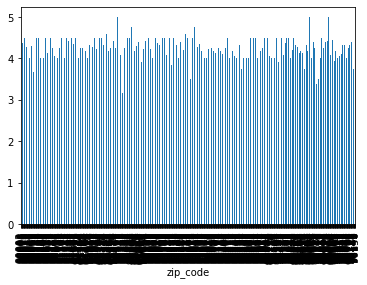

In [14]:
%matplotlib inline
df.groupby('zip_code')['restaurant_rating'].mean().plot.bar()
df.groupby('zip_code')['restaurant_rating'].mean()

## Histogram

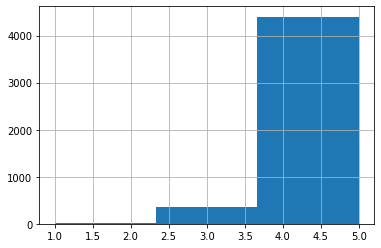

In [15]:
# histogram
df.restaurant_rating.hist(bins=3)

As we can see, most of the ratings fall between 4 and 5 stars

## Boxplots

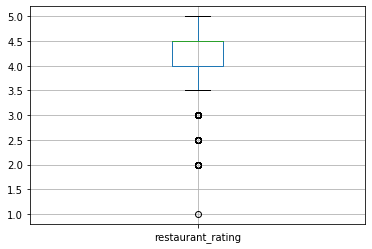

In [19]:
 df.boxplot(column=['restaurant_rating'])

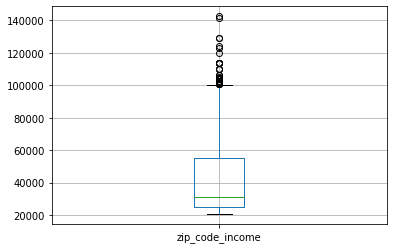

In [20]:
 df.boxplot(column=['zip_code_income'])

The restaurant data seems to have a few outliers, and it is interesting to note that all of the outliers are on the lower end. This is the opposite of the income data, where all ofthe outliers are on the higher end.

## Scatter Plots

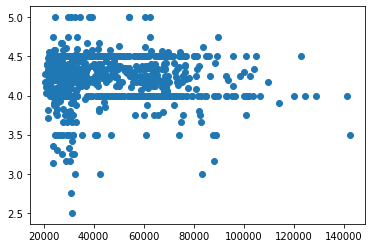

In [16]:
import matplotlib.pyplot as plt

series = df.groupby('zip_code_income')['restaurant_rating'].mean()
import pylab
pylab.scatter(series.index, series)

Although there is not a clear correlation we can make with the data, we can at least notice a few trends. While restaurants that are in the lower income range are all over the place, the restaurants in the higher income areas tend to have a more stable rating.

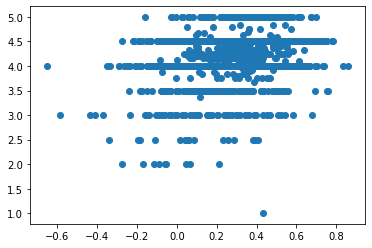

In [17]:
series = df.groupby('avg_sentiment_subjectivity')['restaurant_rating'].mean()
pylab.scatter(series.index, series)

It also seems, from the above data, at least, that the reviews themselves are not a good indicator for whether the rating of the restaurant itself will be good as well. One would think that a restaurant with more favorable reviews would result in a higher average rating. 

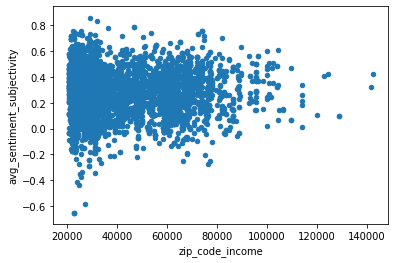

In [18]:
df.plot.scatter(x='zip_code_income',y='avg_sentiment_subjectivity')
# pylab.scatter(series.index, series)

Similar to the comparison with rating and the review sentiment, we see that in areas with a lower median income, the reviews tend to be more wide ranging, with sentiment ranging from -0.6 all the way to 0.8 in areas with a median income of $20,000, while in wealthier areas, the reviews tend to be much more consolidated. 

## Conclusion

Although we didn't find any clear positive or negative correlation between some of the datapoint as we were expecting, we still found some interesting trends in the data. The most ineresting insighty we foiund was that the sentiment of the ratijngs themselves don't necessarily correspond to the ratings. That is, the number of stars someone gives a restaurant is not a clear indicator of how well they will review the restaurant, which makes sense. People may use the same words to describe a similar experience, but their overall sentiment may be very different,as these things are influenced by many other factors.

Another trend we indentified was that ratings in areas with a lower median income area tended to be all over the place, while ratings from areas with a higher median income, both in the actual rating and the sentiments of the reviews, tended to be significantly more stable.